Dylan Hastings

# 1. EDB Score 

In `data/DBData.csv`, you have the full "ease of doing business" dataset from the World Bank. Reformat it into the **Tidy Data** format, so one row is per-year-per-country

Result should look like:

![](EDB_unstack.png)

In [2]:
%matplotlib inline

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [9]:
frt = pd.read_csv('data/DBData.csv')

In [10]:
# Remove irrelevant columns
frt = frt.drop(["Unnamed: 20", 'Indicator Code', 'Country Code'], 1)
# Pivot categories to categorical columns
frt = pd.DataFrame(
        frt.pivot(index='Indicator Name', 
                  columns='Country Name'
        ).unstack(
        ).reset_index(drop=False)
)

In [11]:
frt.columns = ['Year', 'Country', 'Measure', 'Score']

In [15]:
frt = frt.pivot_table(values='Score', index='Measure', columns=['Year', 'Country']
                   ).T.reset_index()
frt

Measure,Year,Country,Dealing with construction permits (DB06-15 methodology) - Score,Dealing with construction permits (DB16-19 methodology) - Score,Dealing with construction permits: Building quality control index (0-15) (DB16-19 methodology),Dealing with construction permits: Building quality control index (0-15) (DB16-19 methodology) - Score,Dealing with construction permits: Cost (% of Warehouse value),Dealing with construction permits: Cost (% of Warehouse value) - Score,Dealing with construction permits: Liability and insurance regimes index (0-2) (DB16-19 methodology),Dealing with construction permits: Procedures (number),...,Trading across borders: Documents to export (number) (DB06-15 methodology),Trading across borders: Documents to export (number) (DB06-15 methodology) - Score,Trading across borders: Documents to import (number) (DB06-15 methodology),Trading across borders: Documents to import (number) (DB06-15 methodology) - Score,Trading across borders: Time to export (days) (DB06-15 methodology) - Score,Trading across borders: Time to export: Border compliance (hours) (DB16-19 methodology) - Score,Trading across borders: Time to export: Documentary compliance (hours) (DB16-19 methodology) - Score,Trading across borders: Time to import (days) (DB06-15 methodology) - Score,Trading across borders: Time to import: Border compliance (hours) (DB16-19 methodology) - Score,Trading across borders: Time to import: Documentary compliance (hours) (DB16-19 methodology) - Score
0,2004,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2004,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2004,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2004,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2004,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2544,2018,Vietnam,NaN,79.03,12.0,80.00,0.7,96.45,0.0,10.0,...,NaN,NaN,NaN,NaN,NaN,66.04,71.01,NaN,80.29,68.62
2545,2018,West Bank and Gaza,NaN,56.70,12.0,80.00,13.9,30.42,0.0,20.0,...,NaN,NaN,NaN,NaN,NaN,96.86,57.99,NaN,98.21,81.45
2546,2018,"Yemen, Rep.",NaN,0.00,NaN,0.00,NaN,0.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,0.00,0.00
2547,2018,Zambia,NaN,71.04,10.0,66.67,3.1,84.45,0.0,10.0,...,NaN,NaN,NaN,NaN,NaN,25.16,43.79,NaN,57.35,70.29


# 2 GDP and ease of doing business

Using the additional data in `data/GDPpc.csv`, join the clean dataset in **1** to the GDP data.

**What are the 3 Ease of Doing Business variables most closely linked to GDP?**

Answer by giving their correlation ratio, and give a possible explanation and a data visualization

**hint:** trying to do `df.corr()` or `sns.pairplot()` on the whole dataset will crash most computers. Be smart about the number of columns you're testing at once.

In [8]:
# Same as above with World Bank GDP Data
gdp = pd.read_csv('data/GDPpc.csv')

In [12]:
# Same as above with World Bank GDP Data
gdp = gdp.drop(['Country Code', 'Indicator Code'], 1)
# One row per country per year with GDP
gdp = pd.DataFrame(
        gdp.pivot(index='Indicator Name', 
                 columns='Country Name'
      ).unstack(
      ).reset_index(drop=False)
)
gdp = gdp.drop('Indicator Name', 1)
gdp.columns = ['Year', 'Country', 'GDPperCap']
gdp.head(3)

,Year,Country,GDPperCap
0,1960,Afghanistan,59.777327
1,1960,Albania,NaN
2,1960,Algeria,244.824806


In [16]:
frt = frt.merge(gdp, how='inner', on=['Year', 'Country'])
frt

,Year,Country,Dealing with construction permits (DB06-15 methodology) - Score,Dealing with construction permits (DB16-19 methodology) - Score,Dealing with construction permits: Building quality control index (0-15) (DB16-19 methodology),Dealing with construction permits: Building quality control index (0-15) (DB16-19 methodology) - Score,Dealing with construction permits: Cost (% of Warehouse value),Dealing with construction permits: Cost (% of Warehouse value) - Score,Dealing with construction permits: Liability and insurance regimes index (0-2) (DB16-19 methodology),Dealing with construction permits: Procedures (number),...,Trading across borders: Documents to export (number) (DB06-15 methodology) - Score,Trading across borders: Documents to import (number) (DB06-15 methodology),Trading across borders: Documents to import (number) (DB06-15 methodology) - Score,Trading across borders: Time to export (days) (DB06-15 methodology) - Score,Trading across borders: Time to export: Border compliance (hours) (DB16-19 methodology) - Score,Trading across borders: Time to export: Documentary compliance (hours) (DB16-19 methodology) - Score,Trading across borders: Time to import (days) (DB06-15 methodology) - Score,Trading across borders: Time to import: Border compliance (hours) (DB16-19 methodology) - Score,Trading across borders: Time to import: Documentary compliance (hours) (DB16-19 methodology) - Score,GDPperCap
0,2004,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2373.581292
1,2004,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2598.908023
2,2004,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1248.404906
3,2004,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4251.574348
4,2004,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1191.961920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2544,2018,Vietnam,NaN,79.03,12.0,80.00,0.7,96.45,0.0,10.0,...,NaN,NaN,NaN,NaN,66.04,71.01,NaN,80.29,68.62,NaN
2545,2018,West Bank and Gaza,NaN,56.70,12.0,80.00,13.9,30.42,0.0,20.0,...,NaN,NaN,NaN,NaN,96.86,57.99,NaN,98.21,81.45,NaN
2546,2018,"Yemen, Rep.",NaN,0.00,NaN,0.00,NaN,0.00,NaN,NaN,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,0.00,0.00,NaN
2547,2018,Zambia,NaN,71.04,10.0,66.67,3.1,84.45,0.0,10.0,...,NaN,NaN,NaN,NaN,25.16,43.79,NaN,57.35,70.29,NaN


In [17]:
frt.corr()

,Dealing with construction permits (DB06-15 methodology) - Score,Dealing with construction permits (DB16-19 methodology) - Score,Dealing with construction permits: Building quality control index (0-15) (DB16-19 methodology),Dealing with construction permits: Building quality control index (0-15) (DB16-19 methodology) - Score,Dealing with construction permits: Cost (% of Warehouse value),Dealing with construction permits: Cost (% of Warehouse value) - Score,Dealing with construction permits: Liability and insurance regimes index (0-2) (DB16-19 methodology),Dealing with construction permits: Procedures (number),Dealing with construction permits: Procedures (number) - Score,Dealing with construction permits: Professional certifications index (0-4) (DB16-19 methodology),...,Trading across borders: Documents to export (number) (DB06-15 methodology) - Score,Trading across borders: Documents to import (number) (DB06-15 methodology),Trading across borders: Documents to import (number) (DB06-15 methodology) - Score,Trading across borders: Time to export (days) (DB06-15 methodology) - Score,Trading across borders: Time to export: Border compliance (hours) (DB16-19 methodology) - Score,Trading across borders: Time to export: Documentary compliance (hours) (DB16-19 methodology) - Score,Trading across borders: Time to import (days) (DB06-15 methodology) - Score,Trading across borders: Time to import: Border compliance (hours) (DB16-19 methodology) - Score,Trading across borders: Time to import: Documentary compliance (hours) (DB16-19 methodology) - Score,GDPperCap
Dealing with construction permits (DB06-15 methodology) - Score,1.000000,0.923907,0.007329,0.190790,-0.520471,0.775285,-0.012435,-0.572719,0.617752,-0.096137,...,0.389312,-0.423146,0.423072,0.369793,0.257673,0.284898,0.425820,0.329208,0.400132,0.349319
Dealing with construction permits (DB16-19 methodology) - Score,0.923907,1.000000,0.482453,0.612789,-0.663627,0.747535,0.236880,-0.450671,0.608814,0.301966,...,0.437328,-0.457535,0.455660,0.399088,0.342275,0.362110,0.462654,0.404960,0.462220,0.449899
Dealing with construction permits: Building quality control index (0-15) (DB16-19 methodology),0.007329,0.482453,1.000000,0.999998,-0.254989,0.186805,0.485744,0.137094,-0.136153,0.784877,...,0.218606,-0.121788,0.118633,0.289602,0.284590,0.269065,0.270938,0.227309,0.261981,0.330947
Dealing with construction permits: Building quality control index (0-15) (DB16-19 methodology) - Score,0.190790,0.612789,0.999998,1.000000,-0.255340,0.326574,0.485747,0.136703,0.099850,0.784866,...,0.249312,-0.162065,0.160039,0.301297,0.310749,0.298547,0.297560,0.273093,0.309666,0.333344
Dealing with construction permits: Cost (% of Warehouse value),-0.520471,-0.663627,-0.254989,-0.255340,1.000000,-0.692801,-0.069488,0.122128,-0.113781,-0.102468,...,-0.249208,0.232033,-0.233058,-0.250682,-0.199513,-0.243420,-0.293241,-0.299631,-0.305934,-0.211779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Trading across borders: Time to export: Documentary compliance (hours) (DB16-19 methodology) - Score,0.284898,0.362110,0.269065,0.298547,-0.243420,0.256418,0.120305,-0.110209,0.165647,0.120112,...,0.590761,-0.542538,0.550632,0.634491,0.720898,1.000000,0.669769,0.659807,0.789992,0.441558
Trading across borders: Time to import (days) (DB06-15 methodology) - Score,0.425820,0.462654,0.270938,0.297560,-0.293241,0.412750,0.128137,-0.112209,0.139082,0.029282,...,0.713482,-0.707436,0.709168,0.950266,0.548148,0.669769,1.000000,0.499725,0.632472,0.496689
Trading across borders: Time to import: Border compliance (hours) (DB16-19 methodology) - Score,0.329208,0.404960,0.227309,0.273093,-0.299631,0.392215,0.047038,-0.138051,0.187125,0.050759,...,0.435760,-0.484956,0.489416,0.447348,0.735146,0.659807,0.499725,1.000000,0.766826,0.400058
Trading across borders: Time to import: Documentary compliance (hours) (DB16-19 methodology) - Score,0.400132,0.462220,0.261981,0.309666,-0.305934,0.373849,0.042

### Trading Across Borders: Time to import (days)

Correlation coefficient with GDP: 0.4967

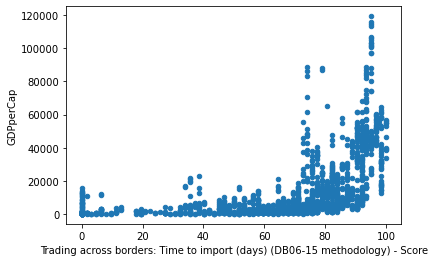

In [23]:
frt.plot.scatter(y='GDPperCap', x='Trading across borders: Time to import (days) (DB06-15 methodology) - Score')

This positive correlation can be explained by the fact that when there is a lower time to import, there is a reduction in trading costs and inefficiency.

### Dealing with construction permits (DB16-19 methodology)

Correlation coefficient with GDP: 0.4499

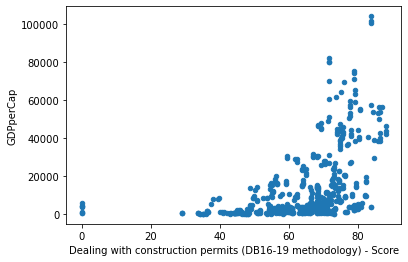

In [26]:
frt.plot.scatter(y='GDPperCap', x='Dealing with construction permits (DB16-19 methodology) - Score')

This positive correlation can be explained by the fact that when it is easier to get a construction permit, the easier it is to build new houses.  This is turn leads to new job availability and an increaese in housing material production.

### Trading Across Borders: Time to export: Documentary compliance

Correlation coefficient with GDP: 0.4416

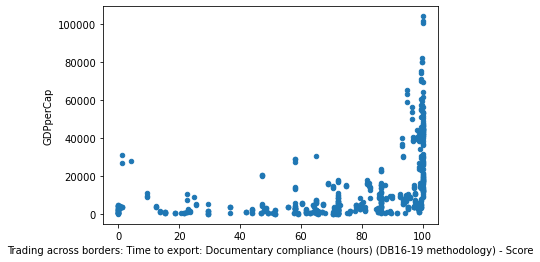

In [32]:
frt.plot.scatter(y='GDPperCap', x='Trading across borders: Time to export: Documentary compliance (hours) (DB16-19 methodology) - Score')

Similar to the time to import, this positive correlation can be explained by the fact that when there is improved documentary compliance, there is a reduction in trading costs and inefficiency.

# 3. Chocolate Nobel question

In this repository is the academic paper `chocolate_nobel.pdf`. 

Explain in 3 paragraphs why this paper's conclusions are bad statistics.

The conlusions in Franz H. Messerli's "Chocolate Consumption, Cognitive Function, and Nobel Laureates" are bad statistics on methodological, statistical and logical levels.  From the methodological perspective, the observed correlation in based on the average chocolate consumption of a country rather than the Nobel laureates themselves.  Conclusions about individual behaviours are made from data about aggregate behaviours, when there can be no guarantee that the relationship seen at a group level hold true for indivuals.  Furthermore, the correlated data is taken over only 2 years for choclate consumption, however the span is over a century for Nobel laureates.  This time gap obviously limits the pertinance of Messerli's coorelational analysis, as chocolate consumption has changed significantly over the past century.  Recent consumption, therefore, is not representative of past periods.  Finally, chocolate is not the only substance that contains flavanoids.  The Journal of Nutrition conducted similar analysis with 2 other flavanoid-rich substances: annual tea and wine.  The same correlation was not observed, proving that flavanoid concentration does not explain this high chocolate-Nobel laureate correlation.

On a statistical level, as Messerli as least concedes, correlation between 2 variables does not prove causation.  This is proven once again by The Journal of Nutrition.  They found an extremely high correlation between the number of IKEA stores and Nobel laureates.  There is clearly no scientific basis for this correlation.

On a logical level, while Messerli  mentions that correlation does not imply causation, his discussion mainly excludes alternate explanation for this correlation.  Since there are unknown factors influencing both variables independently, a third cause could be involved.  For example, the GDP could correlate well with both chocolate consumption and Nobel laureates.  Indeed, The Journal of Nutrition confirmed this to be the case.  In fact, the correlation between GDP and chocolate consumption as well as GDP and Nobel Prize candidates are both higher than the original chocolate and Nobel laureate correlation.